In [1]:
!pip install scikit-learn pandas matplotlib numpy

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('simple_example.csv')
data

,x,y
0,10,7.70
1,10,9.87
2,11,11.18
3,12,10.43
4,13,12.36
5,14,14.15
6,15,15.73
7,16,16.40
8,17,18.86
9,18,16.13


In [4]:
features = ['x']
labels = ['y']
# Divide into training set and test set
train_data = data[:15]
test_data = data[15:]

In [5]:
# Create a linear regression model
model = linear_model.LinearRegression()
# Train the model and estimate model parameters
model.fit(train_data[features], train_data[labels])

LinearRegression()

In [6]:
# Mean Squared Error, the smaller the mean squared error, the better
error = model.predict(test_data[features]) - test_data[labels]
mse = np.mean(error.values ** 2)
# Coefficient of Determination. The closer the coefficient of determination is to 1, the better.
score = model.score(test_data[features], test_data[labels])
mse, score

(0.7261890496067381, 0.8284302073217278)

<ipython-input-7-45d7551bd6ae>:26: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  plt.savefig('linear_ml.png', dpi=200)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


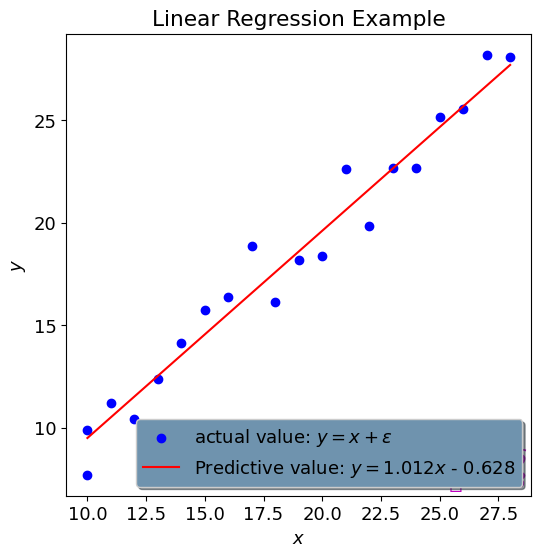

In [7]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# Create a graphics frame
fig = plt.figure(figsize=(6, 6), dpi=100)
# Draw only one picture in the graphics box
ax = fig.add_subplot(111)
ax.set_title('Linear Regression Example')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# Draw a dot graph, using blue dots to represent the original data
ax.scatter(data[features], data[labels], color='b', label='actual value: $y = x + \epsilon$')
# Print different labels depending on whether the intercept is positive or negative
if model.intercept_ > 0:
    label = f'Predictive value: $y = {model.coef_.item():.3f}x$ + {model.intercept_.item():.3f}'
else:
    label = f'Predictive value: $y = {model.coef_.item():.3f}x$ - {abs(model.intercept_.item()):.3f}'
# Draw a line graph, using red lines to represent model results
ax.plot(data[features], model.predict(data[features]), color='r', label=label)
# Set the legend style
legend = plt.legend(shadow=True)
legend.get_frame().set_facecolor('#6F93AE')
# Display the mean square error and coefficient of determination
ax.text(0.99, 0.01, f'Mean square error：{mse:.3f}\ndecisive factor：{score:.3f}',
        style='italic', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='m', fontsize=16)
plt.savefig('linear_ml.png', dpi=200)
plt.show()